# Enhancing Fashion Recommendations through Image Features

1/1 [==============================] - 0s 376ms/step


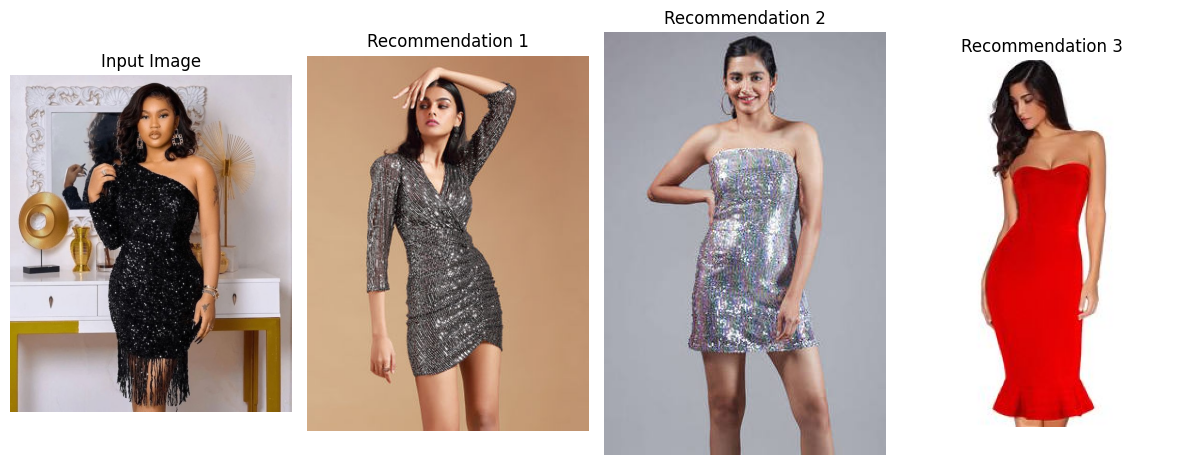

In [34]:
from zipfile import ZipFile
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from scipy.spatial.distance import cosine

# Extract the zip file
def extract_zip(zip_file_path, extraction_directory):
    if not os.path.exists(extraction_directory):
        os.makedirs(extraction_directory)
    
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_directory)

# Display an image
def display_image(image_path):
    image_data = Image.open(image_path)
    plt.imshow(image_data)
    plt.axis('off')
    plt.show()

# Preprocess images and extract features
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

# Recommend similar fashion items based on CNN features
def recommend_fashion_items(input_image_path, all_features, all_image_names, model, top_n=5):
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    similar_indices = [idx for idx in similar_indices if all_image_names[idx] != os.path.basename(input_image_path)]

    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join(image_directory, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
zip_file_path = 'women-fashion.zip'
extraction_directory = 'women_fashion'

extract_zip(zip_file_path, extraction_directory)

image_directory = os.path.join(extraction_directory, 'women fashion')

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', '.webp'))]

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

input_image_path = 'women_fashion/women fashion/one-shoulder, black, sequined dress with fringe detailing at the hem.jpg'
recommend_fashion_items(input_image_path, all_features, all_image_names, model, top_n=4)
